## 분류와 회귀

* 분류 : 데이터 xx의 여러 feature 값들을 이용하여 해당 데이터의 **class y를 추론**하는 것
* 회귀 : 데이터 xx의 여러 feature 값들을 이용하여 연관된 다른 데이터 y의 **정확한 값을 추론**하는 것

# 회귀

회귀분석(Regression Analysis) 이란 통계학에서 전통적으로 많이 사용되던 분석 방법으로, 관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법.


#### 회귀분석으로 풀 수 있는 실생활 문제의 몇 가지 예시

> * 부모의 키와 자식의 키 사이의 관계
> * 자동차의 스펙을 이용한 가격 예측
> * 1인당 국민 총소득과 배기가스 배출량 사이의 관계 예측

위 예시 모두가 독립변수(independent variable)와 종속변수(dependent variable) 사이의 상호 관련성을 규명하는 것임

## 1. 선형 회귀(Linear Regression) 예제
scikin-learn 라이브러리에서 제공하는 'Boston house prices dataset'을 이용할 것

### 데이터셋 불러오기

In [2]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

/Users/jsj/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [3]:
df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52
1,7.67202,0.0,18.10,0.0,0.693,5.747,98.9,1.6334,24.0,666.0,20.2,393.10,19.92
2,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53
3,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
4,0.19802,0.0,10.59,0.0,0.489,6.182,42.4,3.9454,4.0,277.0,18.6,393.63,9.47


In [4]:
print(boston["DESCR"])

# 각 데이터의 attribute 정보를 제공해 줌

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 선형 회귀 적용

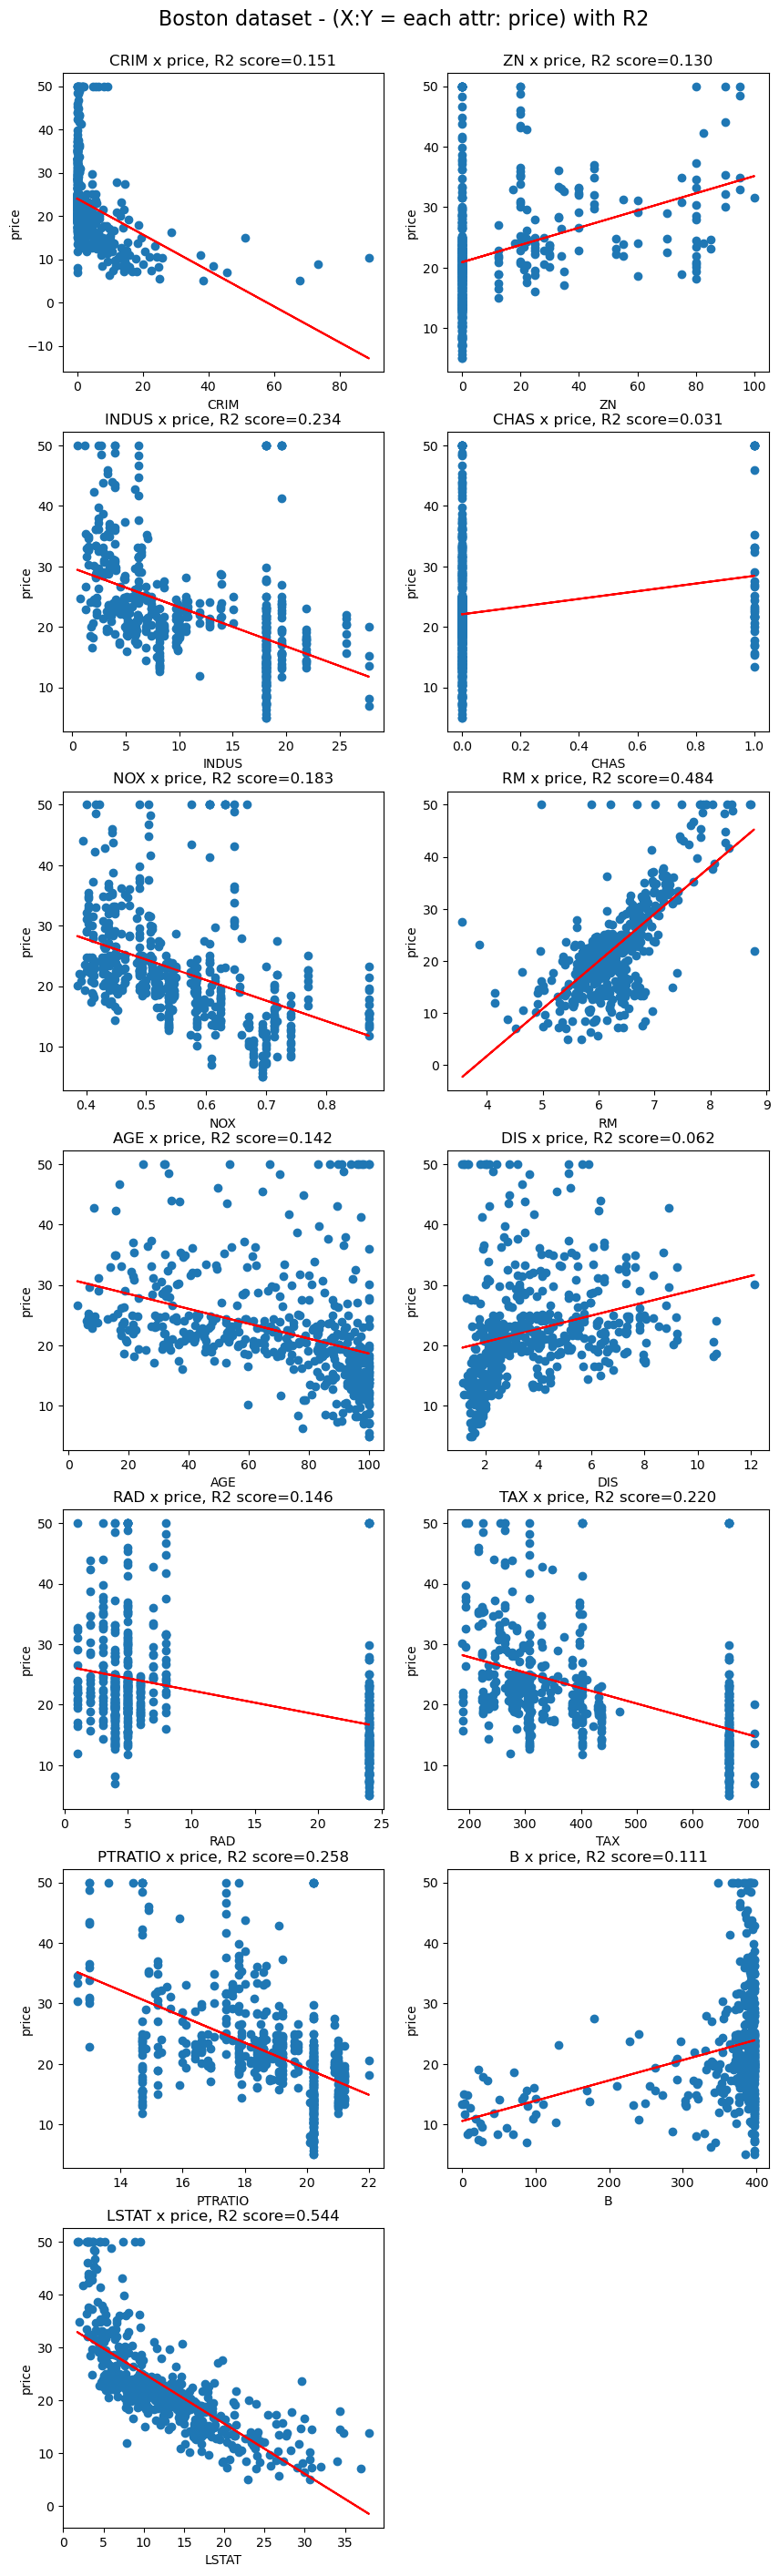

In [5]:
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

## 2. 로지스틱 회귀 분석(Logistic Regression)
데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해 주는 지도 학습 알고리즘


**주로** 1개 이상의 독립변수가 있을 때 이를 이용하여 데이터가 2개의 범주 중 하나에 속하도록 결정하는 **이진 분류(binary classification) 문제를 풀 때** 사용.

#### 유방암 데이터셋을 사용할 것(이진 분류 문제: 양성, 악성)

### 데이터 불러오기

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



/Users/jsj/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

그렇다면 이진 분류가 아닌 여러 범주로 분류하기 위해서는?
## 3. 다중 로지스틱 회귀
### 데이터에 Softmax 함수를 적용한다.
 **Softmax 함수** : 각 범주의 확률 값이 0~1 사이의 값이며, softmax를 적용하면 데이터 값을 모두 더했을 때 그 합이 1이 됨</br>
 * $ softmax(x) = {e^{X_i} \over \sum\limits_{j=0}^{k}{e^{X_j}}} (i=0,1,...k) $



 => 이후 가장 큰 값을 1, 나머지를 0으로 One-Hot Encoding을 거쳐서 분류를 결정

---

## + 유방암 데이터셋에 Softmax 적용 예제
### (1) 딥러닝 모델 설계

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔

#데이터셋 호출

In [4]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()

# 모델 설계

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 2)                 62        
                                                                 
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________


### (2) Softmax 함수를 사용할 경우 손실함수로 Cross entropy 함수를 사용한다
 * $ H(p,q) = -\sum\limits_{x} {p(x)} \log {q(x)} $ 
 
 (p(x)는 실제 데이터의 범주 값, q(x)는 softmax 결과 값)</br>
 #### 손실함수이기 때문에 가중치가 최적화될수록 H(p,q)는 감소.
 
 
 
 *참조
> * [왜 크로스 엔트로피를 쓸까](https://theeluwin.postype.com/post/6080524)</br>
> * [Cross-entropy의 이해](https://3months.tistory.com/436)

In [5]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/20


2022-09-17 23:08:53.718535: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-17 23:08:53.865064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 4ms/step - loss: 55.9519 - accuracy: 0.5273
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 13.9205 - accuracy: 0.6426
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 2.2078 - accuracy: 0.8652
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 1.4110 - accuracy: 0.8926
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 1.1876 - accuracy: 0.9160
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 1.2087 - accuracy: 0.9004
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 1.0280 - accuracy: 0.8945
Epoch 8/20
16/16 [==============================] - 0s 4ms/step - loss: 0.9796 - accuracy: 0.9102
Epoch 9/20
16/16 [==============================] - 0s 4ms/step - loss: 1.2901 - accuracy: 0.8691
Epoch 10/20
16/16 [==============================] - 0s 4ms/step - loss: 0.9014 - accuracy: 0.9004
Epoch 11/20
16/16 [=========

2022-09-17 23:08:56.770293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
